In [1]:
# KNN Classification on Zoo Dataset
# ======================================

# 1) Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [3]:
# 2) Load Dataset
df = pd.read_csv(r"C:\Users\user\Data-Science-main\Zoo.csv")

# Quick look
print(df.head())
print(df.info())
print(df.describe())

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  
<class '

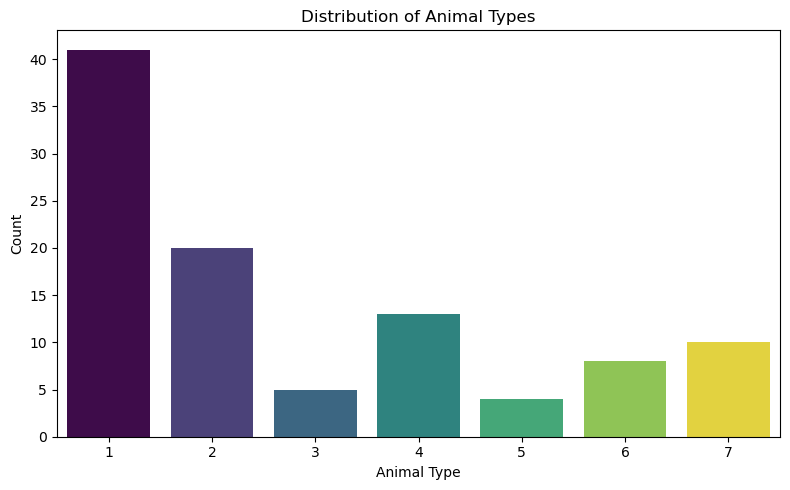

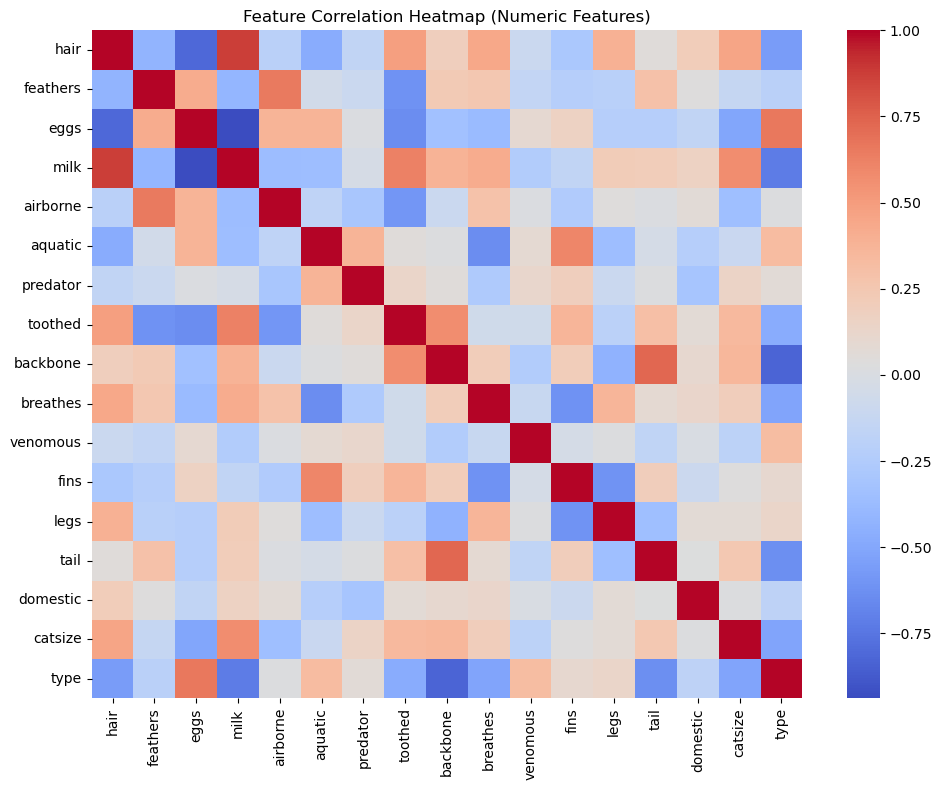

In [7]:
# 3) Visualization
# Countplot (no deprecation warning)
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="type", hue="type", palette="viridis")
if ax.legend_:  # remove redundant legend since hue==x
    ax.legend_.remove()
plt.title("Distribution of Animal Types")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Correlation heatmap (numeric-only, no KeyError)
numeric_df = df.select_dtypes(include="number").copy()

# If you want to exclude the target label from the heatmap, uncomment the next line:
# numeric_df = numeric_df.drop(columns=["type"], errors="ignore")

plt.figure(figsize=(10, 8))
corr = numeric_df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


Missing values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


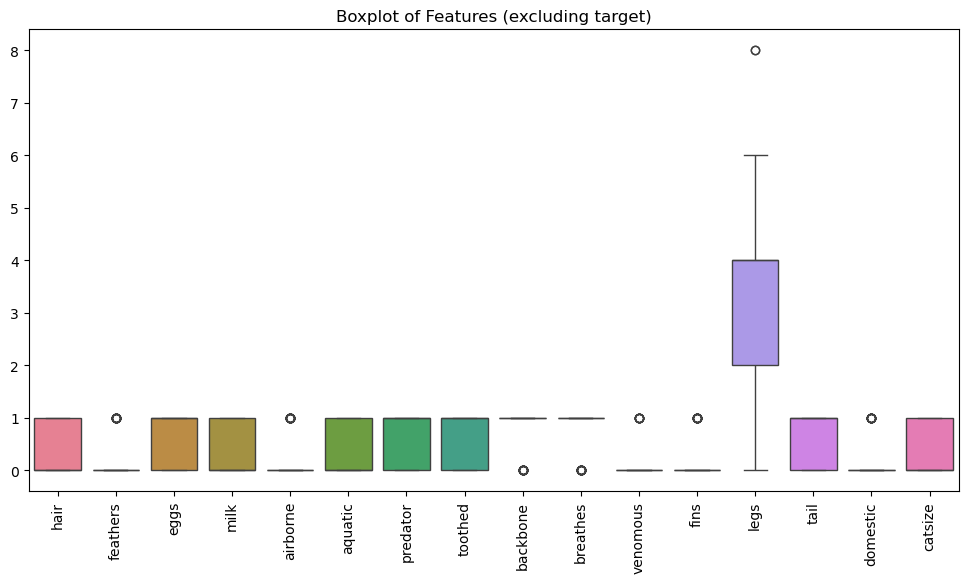

In [9]:
# 4) Preprocessing
# Drop animal_name (not a feature for classification)
if "animal_name" in df.columns:
    df = df.drop(columns=["animal_name"])

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# (No missing values expected, but imputation can be added if needed)

# Outlier check - boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=["type"]))
plt.title("Boxplot of Features (excluding target)")
plt.xticks(rotation=90)
plt.show()

In [12]:

# 5) Split into features & target
X = df.drop(columns=["type"])
y = df["type"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
# 6) Feature scaling
from sklearn.preprocessing import StandardScaler

# keep only numeric/boolean predictors
X_train_num = X_train.select_dtypes(include=["number", "bool"]).copy()
X_test_num  = X_test.select_dtypes(include=["number", "bool"]).copy()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled  = scaler.transform(X_test_num)


In [18]:
# 7) Model training - KNN
k_value = 5  # can be tuned
knn = KNeighborsClassifier(n_neighbors=k_value, metric="minkowski", p=2)  # Euclidean distance
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()


Model Performance:
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



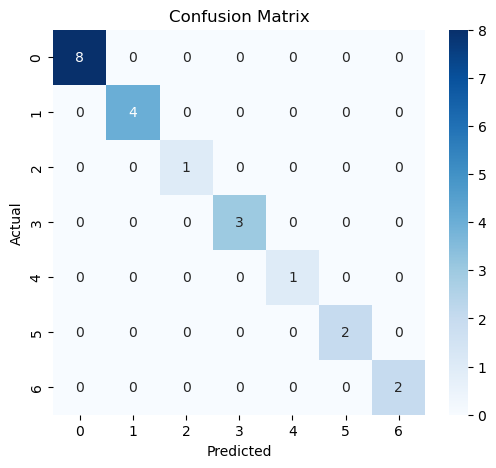

In [20]:
# 8) Predictions & Evaluation
y_pred = knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("\nModel Performance:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision (macro): {prec:.4f}")
print(f"Recall (macro): {rec:.4f}")
print(f"F1-score (macro): {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [3]:
# === Decision boundary visualization (for 2 numeric features) ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# If k_value isn't defined earlier, set a sensible default
try:
    k_value
except NameError:
    k_value = 5

# 1) Pick two numeric columns only (avoid strings like 'clam')
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) < 2:
    raise ValueError(
        "Found fewer than 2 numeric features in X. "
        "Choose two numeric columns explicitly, or use a PCA fallback."
    )

X_2d = X[num_cols[:2]].to_numpy()
y_2d = y.to_numpy()

# 2) Train/test split
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_2d, test_size=0.2, random_state=42, stratify=y_2d
)

# 3) Scale features
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled  = scaler_2d.transform(X_test_2d)

# 4) Clamp k so it's valid for the training size
k_safe = min(k_value, len(X_train_2d_scaled))
if k_safe < 1:
    k_safe = 1
if k_safe != k_value:
    print(f"[info] Adjusted k from {k_value} to {k_safe} to fit training size.")
k_value = k_safe

# 5) Fit KNN (labels can be strings)
knn_2d = KNeighborsClassifier(n_neighbors=k_value)
knn_2d.fit(X_train_2d_scaled, y_train_2d)

# 6) For coloring the scatter only, encode labels to ints
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_2d)
y_test_enc  = le.transform(y_test_2d)

# 7) Decision region mesh
h = 0.02
x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 8) Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.25)
plt.scatter(
    X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1],
    c=y_train_enc, edgecolor='k', marker='o', label="Train", alpha=0.9
)
plt.scatter(
    X_test_2d_scaled[:, 0], X_test_2d_scaled[:, 1],
    c=y_test_enc, edgecolor='k', marker='s', label="Test", alpha=0.9
)
plt.xlabel(f"{num_cols[0]} (scaled)")
plt.ylabel(f"{num_cols[1]} (scaled)")
plt.title(f"KNN Decision Boundary (2 numeric features, k={k_value})")
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'X' is not defined


# Interview Questions:

1. What are the key hyperparameters in KNN?

A k-nearest neighbors is algorithm used for classification and regression. It classifies a new data point by finding the k-nearest points in the training dataset and assigns it the majority class among those neighbors.
Machine learning algorithms have hyperparameters that allow you to tailor the behavior of the algorithm to your specific dataset. Hyperparameters Tuning can improve model performance by about 20% to a range of 77% for all evaluation matrices. Hyperparameter tuning in k-nearest neighbors (KNN) is important because it allows us to optimize the performance of the model. The KNN algorithm has several hyperparameters that can significantly affect the accuracy of the model, such as the number of nearest neighbors to consider (k), the distance metric used to measure similarity, and the weighting scheme used to aggregate the labels of the nearest neighbors.

2. What distance metrics can be used in KNN?

1 Euclidean distance
2 Manhattan distance
3 Minkowski distance
4 Cosine similarity

How to choose the best distance metric

When selecting a distance metric to optimize your KNN algorithm, there is no one-size-fits-all solution. However, you can use some general guidelines to help you make the best choice. Analyzing your data and understanding the type, scale, range, and distribution of your features is essential. Experimenting with different distance metrics and comparing their results and performance on your data and problem is also key. Cross-validation and other evaluation methods can help measure the accuracy and quality of your KNN algorithm with different distance metrics. Additionally, consider the computational complexity and interpretability of the distance metrics, as well as how they affect your KNN algorithm. Lastly, try to use domain knowledge and intuition to select a distance metric that makes sense for your data and problem.